
# Homework 1 — Data Analysis in Business (Variant 4)

In [ ]:
import sys, os, io, textwrap, json, math, pathlib, itertools, re, warnings, gc, random
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
try:
    from google.colab import files
    uploaded = files.upload()
    fname = list(uploaded.keys())[0]
except Exception as e:
    fname = "/Users/anastasiaseraa/Downloads/HW1_var_4.csv"

df = pd.read_csv(fname, sep=";", encoding="utf-8")
print(df.shape)
df.head(3)

Saving HW1_var_4.csv to HW1_var_4 (2).csv
(10243, 44)


,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,4,1000004,Поступление зарплаты на счет,Ремонт,1.0,0.25,женский,0,0,незаконченное высшее,...,0.0,3.0,78.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1000024,Поступление зарплаты на счет,Ремонт,0.0,0.37,женский,0,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1000044,Поступление зарплаты на счет,Ремонт,0.0,0.47,женский,0,0,высшее,...,0.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part 1 — Data loading & structure

In [ ]:
print("Shape:", df.shape)
print("\nDtypes:")
print(df.dtypes)

print("\nDescribe (numeric):")
display(df.describe().T)

print("\nFirst 10 rows:")
display(df.head(10))

Shape: (10243, 44)

Dtypes:
Номер варианта             int64
ID                         int64
INCOME_BASE_TYPE          object
CREDIT_PURPOSE            object
INSURANCE_FLAG           float64
DTI                       object
SEX                       object
FULL_AGE_CHILD_NUMBER      int64
DEPENDANT_NUMBER           int64
EDUCATION                 object
EMPL_TYPE                 object
EMPL_SIZE                 object
BANKACCOUNT_FLAG         float64
Period_at_work           float64
age                      float64
EMPL_PROPERTY             object
EMPL_FORM                 object
FAMILY_STATUS             object
max90days                float64
max60days                float64
max30days                float64
max21days                float64
max14days                float64
avg_num_delay            float64
if_zalog                 float64
num_AccountActive180     float64
num_AccountActive90      float64
num_AccountActive60      float64
Active_to_All_prc        float64
numAccountActiv

,count,mean,std,min,25%,50%,75%,max
Номер варианта,10243.0,4.000000e+00,0.000000,4.0,4.000000e+00,4.000000e+00,4.000000e+00,4.0
ID,10243.0,1.102424e+06,59140.874754,1000004.0,1.051214e+06,1.102424e+06,1.153634e+06,1204844.0
INSURANCE_FLAG,10241.0,6.152719e-01,0.486555,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.0
FULL_AGE_CHILD_NUMBER,10243.0,5.622376e-01,0.770545,0.0,0.000000e+00,0.000000e+00,1.000000e+00,5.0
DEPENDANT_NUMBER,10243.0,4.002734e-03,0.077070,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.0
BANKACCOUNT_FLAG,7933.0,3.602672e-01,0.839064,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.0
Period_at_work,7930.0,6.519596e+01,64.824864,4.0,2.000000e+01,4.500000e+01,8.600000e+01,486.0
age,7933.0,3.628640e+01,8.614798,23.0,2.900000e+01,3.500000e+01,4.300000e+01,63.0
max90days,3908.0,1.644319e+00,1.971619,0.0,0.000000e+00,1.000000e+00,2.000000e+00,28.0
max60days,3908.0,1.170420e+00,1.619603,0.0,0.000000e+00,1.000000e+00,1.000000e+00,28.0



First 10 rows:


,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,4,1000004,Поступление зарплаты на счет,Ремонт,1.0,0.25,женский,0,0,незаконченное высшее,...,0.0,3.0,78.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1000024,Поступление зарплаты на счет,Ремонт,0.0,0.37,женский,0,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1000044,Поступление зарплаты на счет,Ремонт,0.0,0.47,женский,0,0,высшее,...,0.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1000064,2НДФЛ,Ремонт,0.0,NaN,женский,1,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1000084,2НДФЛ,Ремонт,1.0,0.28,мужской,2,0,среднее-специальное,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,1000104,Поступление зарплаты на счет,Покупка автомобиля,1.0,0.56,женский,0,0,среднее,...,0.0,22.0,79.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
6,4,1000124,Форма банка (без печати работодателя),Ремонт,0.0,0.56,мужской,0,0,Высшее/Второе высшее/Ученая степень,...,0.0,9.0,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4,1000144,2НДФЛ,Покупка автомобиля,1.0,NaN,женский,0,0,второе высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,1000164,Поступление зарплаты на счет,Другое,1.0,0.53,мужской,1,0,среднее-специальное,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4,1000184,Поступление зарплаты на счет,Ремонт,1.0,0.26,мужской,0,0,среднее,...,3.0,21.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
missing = df.isna().mean().sort_values(ascending=False).to_frame("share_missing").reset_index().rename(columns={"index":"column"})
display(missing.head(30))

,column,share_missing
0,avg_num_delay,0.644440
1,all_credits,0.642878
2,own_closed,0.642878
3,Active_not_cc,0.642878
4,max_MnthAfterLoan,0.642878
5,dlq_exist,0.642878
6,thirty_in_a_year,0.642878
7,num_AccountActive60,0.642878
8,num_AccountActive180,0.642878
9,num_AccountActive90,0.642878


## Part 2 — Exploratory Data Analysis (EDA)

Primary target: dlq_exist

Target value counts:
dlq_exist
0.0    1585
1.0    2073
NaN    6585
Name: count, dtype: int64


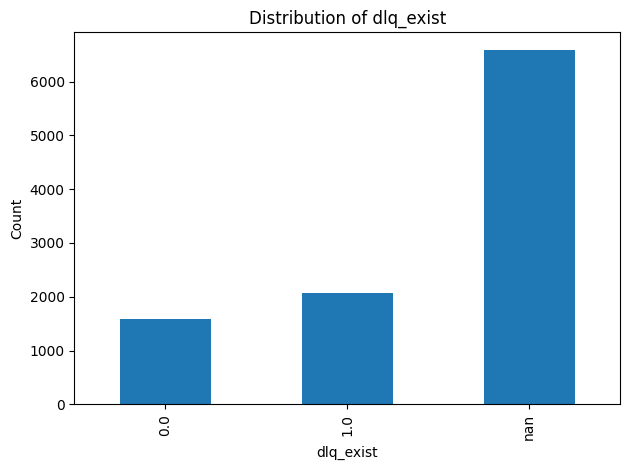

In [ ]:
priority = ["dlq_exist","ninety_in_a_year","sixty_in_a_year","thirty_in_a_year","ninety_vintage","sixty_vintage","thirty_vintage"]
primary_target = None
for c in priority:
    if c in df.columns:
        primary_target = c
        break

print("Primary target:", primary_target)
assert primary_target is not None, "No suitable target was found. Please check column names."

vc = df[primary_target].value_counts(dropna=False).sort_index()
print("\nTarget value counts:")
print(vc)

plt.figure()
vc.plot(kind="bar")
plt.xlabel(primary_target)
plt.ylabel("Count")
plt.title(f"Distribution of {primary_target}")
plt.tight_layout()
plt.savefig("target_distribution.png")
plt.show()

DTI converted to numeric


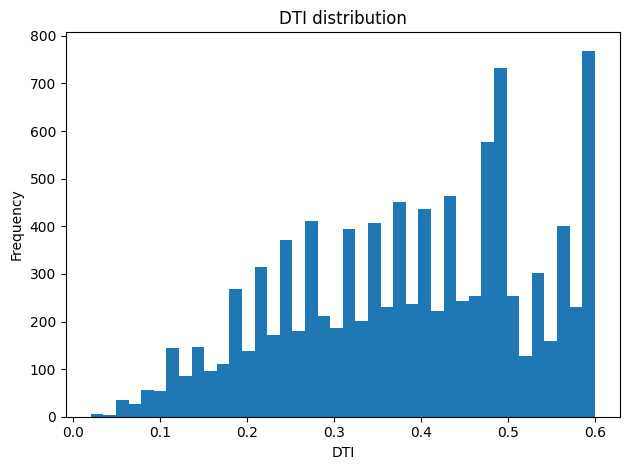

In [ ]:
if "DTI" in df.columns and df["DTI"].dtype == "object":
    dti_num = (df["DTI"].astype(str)
               .str.replace(",", ".", regex=False)
               .str.replace(" ", "", regex=False)
               .str.replace("%", "", regex=False))
    df["DTI_num"] = pd.to_numeric(dti_num, errors="coerce")
    print("DTI converted to numeric")
else:
    print("No textual DTI to convert or already numeric.")

if "DTI_num" in df.columns:
    plt.figure()
    df["DTI_num"].dropna().plot(kind="hist", bins=40)
    plt.xlabel("DTI")
    plt.ylabel("Frequency")
    plt.title("DTI distribution")
    plt.tight_layout()
    plt.savefig("dti_distribution.png")
    plt.show()

In [ ]:
if pd.api.types.is_numeric_dtype(df[primary_target]):
    numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c not in ["ID","Номер варианта"]]
    corr_series = df[numeric_cols].corr(numeric_only=True)[primary_target].sort_values(ascending=False)
    corr_table = corr_series.to_frame("pearson_corr_with_target").reset_index().rename(columns={"index":"feature"})
    display(corr_table.head(30))
else:
    print("Target is non-numeric, skip Pearson correlation.")

,feature,pearson_corr_with_target
0,dlq_exist,1.000000
1,avg_num_delay,0.463316
2,sum_of_paym_months,0.370916
3,thirty_in_a_year,0.361122
4,all_credits,0.355764
5,max_MnthAfterLoan,0.309205
6,numAccountClosed,0.300684
7,numAccountActiveAll,0.282359
8,sixty_in_a_year,0.265605
9,ninety_in_a_year,0.230151


In [ ]:
cat_candidates = ["INCOME_BASE_TYPE","CREDIT_PURPOSE","SEX","EDUCATION","EMPL_TYPE","EMPL_SIZE"]
for cat in cat_candidates:
    if cat in df.columns:
        grp = df.groupby(cat)[primary_target].mean().sort_values(ascending=False)
        display(grp.head(20))

,dlq_exist
INCOME_BASE_TYPE,
Форма банка (без печати работодателя),0.659851
2НДФЛ,0.546358
Поступление зарплаты на счет,0.519490
Свободная форма с печатью работодателя,0.511696


,dlq_exist
CREDIT_PURPOSE,
Обучение,0.660714
Покупка бытовой техники,0.633333
Покупка мебели,0.632353
Лечение,0.617021
Ремонт,0.578035
Покупка земли,0.575758
Другое,0.568966
Отпуск,0.557143
Покупка недвижимости/ строительство,0.550562


,dlq_exist
SEX,
женский,0.588488
мужской,0.544191


,dlq_exist
EDUCATION,
ученая степень,1.000000
Высшее/Второе высшее/Ученая степень,0.604466
незаконченное высшее,0.595238
второе высшее,0.586957
среднее,0.567251
среднее-специальное,0.556314
высшее,0.555500
*n.a.*,0.437500
Неполное среднее,0.000000


,dlq_exist
EMPL_TYPE,
другое,1.000000
менеджер высшего звена,0.651466
менеджер по продажам,0.603774
менеджер среднего звена,0.585629
торговый представитель,0.578947
вспомогательный персонал,0.574046
специалист,0.544776
рабочий,0.495298
страховой агент,NaN


,dlq_exist
EMPL_SIZE,
< 50,0.604924
>250,0.555080
>100,NaN
>=100,NaN
>=150,NaN
>=200,NaN
>=50,NaN


## Part 3 — Preprocessing & Baseline model

Using 32 numeric and 10 categorical features.
ROC AUC: 0.9962

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       396
           1       0.98      0.97      0.97       519

    accuracy                           0.97       915
   macro avg       0.97      0.97      0.97       915
weighted avg       0.97      0.97      0.97       915



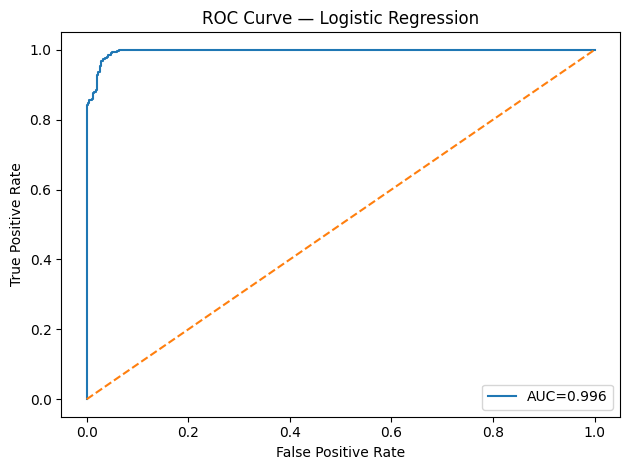

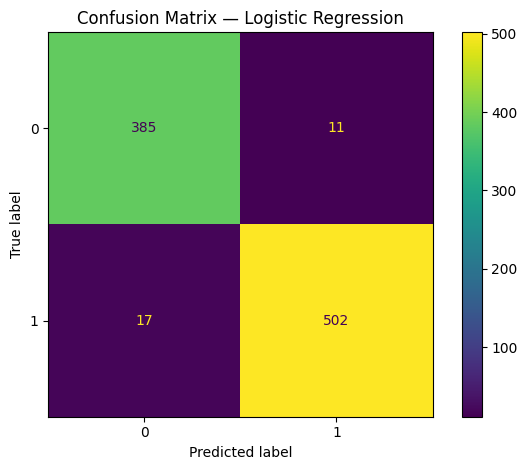

In [ ]:
work = df[df[primary_target].notna()].copy()

y = work[primary_target].astype(int)

id_like = {"ID","Номер варианта", primary_target}
feature_cols = [c for c in work.columns if c not in id_like]
num_feats = [c for c in feature_cols if pd.api.types.is_numeric_dtype(work[c])]
cat_feats = [c for c in feature_cols if c not in num_feats]

print(f"Using {len(num_feats)} numeric and {len(cat_feats)} categorical features.")

num_transformer = Pipeline(steps=[
    ("imp", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=False))
])

cat_transformer = Pipeline(steps=[
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_feats),
        ("cat", cat_transformer, cat_feats),
    ]
)

clf = Pipeline(steps=[
    ("prep", preprocess),
    ("mdl", LogisticRegression(max_iter=1000))
])

strat = y if y.nunique() == 2 else None
X_train, X_test, y_train, y_test = train_test_split(work[feature_cols], y, test_size=0.25, random_state=42, stratify=strat)

clf.fit(X_train, y_train)

proba = clf.predict_proba(X_test)[:,1]
pred = (proba >= 0.5).astype(int)

auc = roc_auc_score(y_test, proba)
print("ROC AUC:", round(auc, 4))

print("\nClassification report:")
print(classification_report(y_test, pred))

fpr, tpr, thr = roc_curve(y_test, proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.tight_layout()
plt.savefig("roc_curve_logreg.png")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title("Confusion Matrix — Logistic Regression")
plt.tight_layout()
plt.savefig("confusion_matrix_logreg.png")
plt.show()

In [ ]:
ohe = clf.named_steps["prep"].named_transformers_["cat"].named_steps["onehot"]
num_names = num_feats
cat_names = list(ohe.get_feature_names_out(cat_feats)) if len(cat_feats)>0 else []
feat_names = np.array(num_names + cat_names)

coef = clf.named_steps["mdl"].coef_.ravel()
top_idx = np.argsort(np.abs(coef))[::-1][:30]
fi = pd.DataFrame({"feature": feat_names[top_idx], "coef": coef[top_idx]})
display(fi.head(30))

,feature,coef
0,avg_num_delay,16.460048
1,sum_of_paym_months,1.190588
2,thirty_in_a_year,1.065675
3,EDUCATION_незаконченное высшее,-0.740925
4,DTI_0.37,-0.572593
5,DTI_0.46,0.535379
6,CREDIT_PURPOSE_Лечение,-0.534809
7,DTI_0.13,0.512659
8,thirty_vintage,0.510458
9,DTI_0.27,0.500175
